# Coursework 2 - ECMM445 Learning from Data (MSc only) 

### Enter your candidate number here: 033666

## Task 1

In [2]:
# Relevant Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Data and split into source and target
dia_all = pd.read_csv("diabetes.txt")
sourcevars = dia_all.iloc[:,:-1] #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

In [3]:
def distance_cw2(x, y):
    m = 3 # m stored to allow for easy changing later
    
    # Grab indices without replacement
    indices = np.random.choice(x.shape[0], size=m, replace=False)
    total = 0
    
    # Calculate sum of square differences
    for i in indices:
        total += (x[i] - y[i])**2
    
    return np.sqrt(total)

In [4]:
kf = KFold(n_splits=10)

# Generate Classifiers
knn_cw2 = KNeighborsClassifier(n_neighbors=1, metric=distance_cw2)
knn_euc = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_man = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_che = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')

tests = []

for train_index, test_index in kf.split(sourcevars, targetvar):
    X_train = sourcevars.iloc[train_index]
    X_test = sourcevars.iloc[test_index]
    Y_train = targetvar.iloc[train_index]
    Y_test = targetvar.iloc[test_index]
    
    # Train Models
    knn_cw2.fit(X_train, Y_train.values.ravel())
    knn_euc.fit(X_train, Y_train.values.ravel())
    knn_man.fit(X_train, Y_train.values.ravel())
    knn_che.fit(X_train, Y_train.values.ravel())
    
    # Make Predictions and Calculate Accuracy Score
    preds = knn_cw2.predict(X_test)
    knn_cw2_acc = accuracy_score(Y_test, preds)
    
    preds = knn_euc.predict(X_test)
    knn_euc_acc = accuracy_score(Y_test, preds)
    
    preds = knn_man.predict(X_test)
    knn_man_acc = accuracy_score(Y_test, preds)
    
    preds = knn_che.predict(X_test)
    knn_che_acc = accuracy_score(Y_test, preds)
    
    tests.append([knn_cw2_acc, knn_euc_acc, knn_man_acc, knn_che_acc])

data = pd.DataFrame(tests, columns=['CW2', 'EUC', 'MAN', 'CHE'])

print("==========MEAN============")
print(data.mean())
print("==========STD=============")
print(data.std())

data

==========MEAN============
CW2    0.635270
EUC    0.677051
MAN    0.692652
CHE    0.684826
dtype: float64
==========STD=============
CW2    0.067552
EUC    0.066932
MAN    0.066569
CHE    0.052031
dtype: float64


,CW2,EUC,MAN,CHE
0,0.545455,0.558442,0.545455,0.623377
1,0.636364,0.740260,0.766234,0.753247
2,0.623377,0.610390,0.688312,0.662338
3,0.649351,0.623377,0.649351,0.610390
4,0.753247,0.701299,0.714286,0.688312
5,0.610390,0.714286,0.753247,0.740260
6,0.649351,0.766234,0.766234,0.740260
7,0.727273,0.727273,0.701299,0.714286
8,0.618421,0.631579,0.657895,0.631579
9,0.539474,0.697368,0.684211,0.684211


In [5]:
# Generate Classifiers
knn_cw2 = KNeighborsClassifier(n_neighbors=3, metric=distance_cw2)
knn_euc = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_man = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_che = KNeighborsClassifier(n_neighbors=3, metric='chebyshev')

tests3 = []

for train_index, test_index in kf.split(sourcevars, targetvar):
    X_train = sourcevars.iloc[train_index]
    X_test = sourcevars.iloc[test_index]
    Y_train = targetvar.iloc[train_index]
    Y_test = targetvar.iloc[test_index]
    
    # Train Models
    knn_cw2.fit(X_train, Y_train.values.ravel())
    knn_euc.fit(X_train, Y_train.values.ravel())
    knn_man.fit(X_train, Y_train.values.ravel())
    knn_che.fit(X_train, Y_train.values.ravel())
    
    # Make Predictions and Calculate Accuracy Score
    preds = knn_cw2.predict(X_test)
    knn_cw2_acc = accuracy_score(Y_test, preds)
    
    preds = knn_euc.predict(X_test)
    knn_euc_acc = accuracy_score(Y_test, preds)
    
    preds = knn_man.predict(X_test)
    knn_man_acc = accuracy_score(Y_test, preds)
    
    preds = knn_che.predict(X_test)
    knn_che_acc = accuracy_score(Y_test, preds)
    
    tests3.append([knn_cw2_acc, knn_euc_acc, knn_man_acc, knn_che_acc])

data3 = pd.DataFrame(tests3, columns=['CW2', 'EUC', 'MAN', 'CHE'])

print("==========MEAN============")
print(data3.mean())
print("==========STD=============")
print(data3.std())

data3

==========MEAN============
CW2    0.653708
EUC    0.705605
MAN    0.695267
CHE    0.704323
dtype: float64
==========STD=============
CW2    0.042410
EUC    0.063837
MAN    0.058503
CHE    0.070359
dtype: float64


,CW2,EUC,MAN,CHE
0,0.623377,0.623377,0.610390,0.571429
1,0.701299,0.766234,0.727273,0.753247
2,0.636364,0.649351,0.636364,0.662338
3,0.558442,0.662338,0.649351,0.662338
4,0.636364,0.779221,0.740260,0.779221
5,0.675325,0.792208,0.766234,0.753247
6,0.675325,0.714286,0.701299,0.740260
7,0.675325,0.753247,0.766234,0.792208
8,0.657895,0.631579,0.631579,0.644737
9,0.697368,0.684211,0.723684,0.684211


In [6]:
# Generate Classifiers
knn_cw2 = KNeighborsClassifier(n_neighbors=5, metric=distance_cw2)
knn_euc = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_man = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_che = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')

tests5 = []

for train_index, test_index in kf.split(sourcevars, targetvar):
    X_train = sourcevars.iloc[train_index]
    X_test = sourcevars.iloc[test_index]
    Y_train = targetvar.iloc[train_index]
    Y_test = targetvar.iloc[test_index]
    
    # Train Models
    knn_cw2.fit(X_train, Y_train.values.ravel())
    knn_euc.fit(X_train, Y_train.values.ravel())
    knn_man.fit(X_train, Y_train.values.ravel())
    knn_che.fit(X_train, Y_train.values.ravel())
    
    # Make Predictions and Calculate Accuracy Score
    preds = knn_cw2.predict(X_test)
    knn_cw2_acc = accuracy_score(Y_test, preds)
    
    preds = knn_euc.predict(X_test)
    knn_euc_acc = accuracy_score(Y_test, preds)
    
    preds = knn_man.predict(X_test)
    knn_man_acc = accuracy_score(Y_test, preds)
    
    preds = knn_che.predict(X_test)
    knn_che_acc = accuracy_score(Y_test, preds)
    
    tests5.append([knn_cw2_acc, knn_euc_acc, knn_man_acc, knn_che_acc])

data5 = pd.DataFrame(tests5, columns=['CW2', 'EUC', 'MAN', 'CHE'])

print("==========MEAN============")
print(data5.mean())
print("==========STD=============")
print(data5.std())

data5

==========MEAN============
CW2    0.649778
EUC    0.726555
MAN    0.736842
CHE    0.713517
dtype: float64
==========STD=============
CW2    0.033899
EUC    0.065165
MAN    0.068004
CHE    0.068550
dtype: float64


,CW2,EUC,MAN,CHE
0,0.701299,0.636364,0.662338,0.597403
1,0.662338,0.831169,0.844156,0.779221
2,0.610390,0.701299,0.662338,0.714286
3,0.610390,0.636364,0.688312,0.597403
4,0.649351,0.714286,0.779221,0.753247
5,0.636364,0.753247,0.792208,0.766234
6,0.688312,0.740260,0.792208,0.727273
7,0.610390,0.805195,0.779221,0.792208
8,0.644737,0.684211,0.657895,0.710526
9,0.684211,0.763158,0.710526,0.697368


In [7]:
# Generate Classifiers
knn_cw2 = KNeighborsClassifier(n_neighbors=7, metric=distance_cw2)
knn_euc = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_man = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn_che = KNeighborsClassifier(n_neighbors=7, metric='chebyshev')

tests7 = []

for train_index, test_index in kf.split(sourcevars, targetvar):
    X_train = sourcevars.iloc[train_index]
    X_test = sourcevars.iloc[test_index]
    Y_train = targetvar.iloc[train_index]
    Y_test = targetvar.iloc[test_index]
    
    # Train Models
    knn_cw2.fit(X_train, Y_train.values.ravel())
    knn_euc.fit(X_train, Y_train.values.ravel())
    knn_man.fit(X_train, Y_train.values.ravel())
    knn_che.fit(X_train, Y_train.values.ravel())
    
    # Make Predictions and Calculate Accuracy Score
    preds = knn_cw2.predict(X_test)
    knn_cw2_acc = accuracy_score(Y_test, preds)
    
    preds = knn_euc.predict(X_test)
    knn_euc_acc = accuracy_score(Y_test, preds)
    
    preds = knn_man.predict(X_test)
    knn_man_acc = accuracy_score(Y_test, preds)
    
    preds = knn_che.predict(X_test)
    knn_che_acc = accuracy_score(Y_test, preds)
    
    tests7.append([knn_cw2_acc, knn_euc_acc, knn_man_acc, knn_che_acc])

data7 = pd.DataFrame(tests7, columns=['CW2', 'EUC', 'MAN', 'CHE'])

print("==========MEAN============")
print(data7.mean())
print("==========STD=============")
print(data7.std())

data7

==========MEAN============
CW2    0.666746
EUC    0.744805
MAN    0.730366
CHE    0.717430
dtype: float64
==========STD=============
CW2    0.056352
EUC    0.059969
MAN    0.067042
CHE    0.065170
dtype: float64


,CW2,EUC,MAN,CHE
0,0.558442,0.675325,0.675325,0.649351
1,0.623377,0.805195,0.792208,0.779221
2,0.701299,0.701299,0.701299,0.688312
3,0.623377,0.636364,0.610390,0.584416
4,0.701299,0.740260,0.753247,0.740260
5,0.623377,0.792208,0.792208,0.753247
6,0.740260,0.766234,0.779221,0.753247
7,0.701299,0.831169,0.818182,0.805195
8,0.710526,0.750000,0.671053,0.723684
9,0.684211,0.750000,0.710526,0.697368


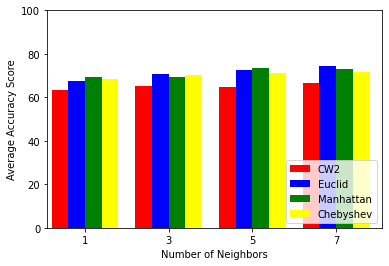

,CW2_Mean,EUC_Mean,MAN_Mean,CHE_Mean,CW2_STD,EUC_STD,MAN_STD,CHE_STD
1,0.635270,0.677051,0.692652,0.684826,0.067552,0.066932,0.066569,0.052031
3,0.653708,0.705605,0.695267,0.704323,0.042410,0.063837,0.058503,0.070359
5,0.649778,0.726555,0.736842,0.713517,0.033899,0.065165,0.068004,0.068550
7,0.666746,0.744805,0.730366,0.717430,0.056352,0.059969,0.067042,0.065170


In [8]:
summary = []

# Create summary data from the tests
for i in [data, data3, data5, data7]:
    summary.append([i.mean()[0], i.mean()[1], i.mean()[2], i.mean()[3],
                   i.std()[0], i.std()[1], i.std()[2], i.std()[3]])

df = pd.DataFrame(summary, columns=['CW2_Mean', 'EUC_Mean', 'MAN_Mean', 'CHE_Mean',
                                   'CW2_STD', 'EUC_STD', 'MAN_STD', 'CHE_STD'],
                 index=[1,3,5,7])

# Restructure data for graphing
means_cw2 = [data.mean()[0], data3.mean()[0], data5.mean()[0], data7.mean()[0]]
means_euc = [data.mean()[1], data3.mean()[1], data5.mean()[1], data7.mean()[1]]
means_man = [data.mean()[2], data3.mean()[2], data5.mean()[2], data7.mean()[2]]
means_che = [data.mean()[3], data3.mean()[3], data5.mean()[3], data7.mean()[3]]

labels = ['1', '3', '5', '7']

fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(labels)) + np.array([0.45, 0.45, 0.45, 0.45]))
ax.set_xticklabels(labels)

K_CW2 = plt.bar(x=[x + 0.15 for x in range(4)], height=np.array(means_cw2) * 100, width=0.2, color='red')
K_EUC = plt.bar(x=[x + 0.35 for x in range(4)], height=np.array(means_euc) * 100, width=0.2, color='blue')
K_MAN = plt.bar(x=[x + 0.55 for x in range(4)], height=np.array(means_man) * 100, width=0.2, color='green')
K_CHE = plt.bar(x=[x + 0.75 for x in range(4)], height=np.array(means_che) * 100, width=0.2, color='yellow')

# Magic Numbers for Graph Aesthetics
plt.xlim(0, 4)
plt.ylim(0, 100)

plt.legend((K_CW2[0], K_EUC[0], K_MAN[0], K_CHE[0]), ("CW2", "Euclid","Manhattan", "Chebyshev"), loc="lower right")
plt.ylabel("Average Accuracy Score")

plt.xlabel("Number of Neighbors")

plt.show()

df

## Task 2
   

In [9]:
# Relevant Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.random import sample_without_replacement
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Load Training Data and split into source and target
task2_train = pd.read_csv("task2_train.txt")
t2tr_sourcevars = task2_train.iloc[:,:-1] #all rows + all columns except the last one
t2tr_targetvar = task2_train.iloc[:,-1:] #all rows + only the last column

# Load Testing Data and split into source and target
task2_test = pd.read_csv("task2_test.txt")
t2te_sourcevars = task2_test.iloc[:,:-1] #all rows + all columns except the last one
t2te_targetvar = task2_test.iloc[:,-1:] #all rows + only the last column

In [10]:
# Create Classifiers with given parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
dt_classifier = DecisionTreeClassifier()
nn_classifier = MLPClassifier(hidden_layer_sizes=(8, 3))

# Scaler for standardisation and list for holding results
scaler = StandardScaler()
tests = []

for j in range(50):
    test = []
    
    # Generator loop for noise percentage
    for i in np.arange(0, 0.32, 0.02):
        t2tr_targetvar = task2_train.iloc[:,-1:]
        n = i * t2tr_targetvar.size
        
        # Randomly select samples
        indices = sample_without_replacement(t2tr_targetvar.size, n)
        
        # Add noise in desired manner
        for index in indices:
            t2tr_targetvar.iloc[index]["class"] = "tested_negative" if t2tr_targetvar.iloc[index]["class"] == "tested_positive" else "tested_positive"
        
        # Fit scaler for standardisation
        scaler.fit(t2tr_sourcevars)
        
        # Scale
        t2tr_sourcevars = scaler.transform(t2tr_sourcevars)
        t2te_sourcevars = scaler.transform(t2te_sourcevars)
        
        # Train Classifiers
        knn_classifier.fit(t2tr_sourcevars, t2tr_targetvar.values.ravel())
        dt_classifier.fit(t2tr_sourcevars, t2tr_targetvar.values.ravel())
        nn_classifier.fit(t2tr_sourcevars, t2tr_targetvar.values.ravel())
        
        # Run Predictions
        knn_preds = knn_classifier.predict(t2te_sourcevars)
        dt_preds = dt_classifier.predict(t2te_sourcevars)
        nn_preds = nn_classifier.predict(t2te_sourcevars)
        
        # Record Accuracy Scores
        knn_acc = accuracy_score(t2te_targetvar, knn_preds)
        dt_acc = accuracy_score(t2te_targetvar, dt_preds)
        nn_acc = accuracy_score(t2te_targetvar, nn_preds)
        
        test += [knn_acc, dt_acc, nn_acc]
    tests.append(test)

averages = []

# Calculate averages of each classifier on each amount of noise
for j in range(len(tests[0])):
    total = 0
    for i in range(len(tests)):
        total += tests[i][j]
    averages.append(total / len(tests))       

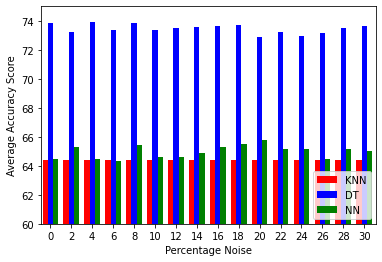

In [29]:
knn_averages, dt_averages, nn_averages = [], [], []

# Restrucure data for graph
for i in range(len(averages) // 3):
    knn_averages.append(averages[i * 3])
    dt_averages.append(averages[(i * 3) + 1])
    nn_averages.append(averages[(i * 3) + 2])

labels = [i for i in range(0, 32, 2)]

fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(labels)) + np.array([0.45 for _ in range(len(labels))]))
ax.set_xticklabels(labels)

# Plots for each classifier
KNN = plt.bar(x=[x + 0.2 for x in range(16)], height=np.array(knn_averages) * 100, width=0.25, color='red')
DT = plt.bar(x=[x + 0.45 for x in range(16)], height=np.array(dt_averages) * 100, width=0.25, color='blue')
NN = plt.bar(x=[x + 0.70 for x in range(16)], height=np.array(nn_averages) * 100, width=0.25, color='green')

# Magic Numbers for Graph Aesthetics
plt.xlim(0, 16)
plt.ylim(60, 75)

plt.legend((KNN[0], DT[0], NN[0]), ("KNN", "DT","NN"), loc="lower right")
plt.ylabel("Average Accuracy Score")

plt.xlabel("Percentage Noise")

plt.show()

## Task 3 [Justification]

### Task 1

From the chart, it can be seen that our implemented distance function consistently gave the worst results. This is likely due to the fact that it only accounts for 3 attributes, regardless of the size of the vector. This might not be so bad if we chose the three attributes or had a method for finding which attributes are affecting the classification the most. As is, we are just randomly selecting. This will lead to increased speed on large datasets, but in this case the speedup is negligible compared to the accuracy drop. Interestingly, the method we developed had a lower standard deviation than the others, meaning it was the most consistent among them in terms of each test. It can also be found that as neighbours increased, the accuracy also increased for each method.

Whilst our method proved to be less accurate, with some tweaking to choose important attributes from the vector as opposed to randomly or by changing the m value for the number of attributes, it may prove to be a worthwhile heuristic when speed may be more important.

### Task 2

The results of this test were interesting. All of the classifiers were fairly consistent in their accuracy scores, despite the noise added to the data. Of particular note is the KNN classifier which showed no variation, or at least negligible variation. The KNN classifier was the least accurate overall, and the decision tree classifier was consistently the most accurate but showed the most variation due to noise. It would be interesting to look at how the classifiers would have dealt with higher proportions of noise, other noise generation methods, or different parameters for the classifiers themselves.

A further thing to note is the surpressed convergence warnings for the neural network, perhaps additional training data for the classifier would be helpful. Though the model currently out performs the KNN classifier. 